In [3]:
from graphviz import Digraph

# Create a Digraph object
flowchart = Digraph(format='png')

# Define the nodes
flowchart.node('Start', 'Start', shape='ellipse')
flowchart.node('A', 'Literature review on\nthe evolution of LVMs', shape='box')
flowchart.node('B', 'State of the Art study', shape='box')
flowchart.node('C', 'Learn about LVM architectures\n(ViT, ViViT, Auto-encoders)', shape='box')
flowchart.node('D', 'Generalize LVMs for various tasks\n(Segmentation, Object Detection, Captioning)', shape='box')
flowchart.node('E', 'Experiment on video datasets\n(UCF101, Kinetics 400)', shape='box')
flowchart.node('F', 'Report findings, experiments, and results', shape='box')
flowchart.node('End', 'End', shape='ellipse')

# Define the connections between nodes
flowchart.edge('Start', 'A')
flowchart.edge('A', 'B')
flowchart.edge('B', 'C')
flowchart.edge('C', 'D')
flowchart.edge('D', 'E')
flowchart.edge('E', 'F')
flowchart.edge('F', 'End')

# Render the flowchart
flowchart.render('LVM_project_flowchart', view=True)


'LVM_project_flowchart.png'

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/hamzaz/snap/code/common/.cache/gio-modules/libgiolibproxy.so
/usr/bin/eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


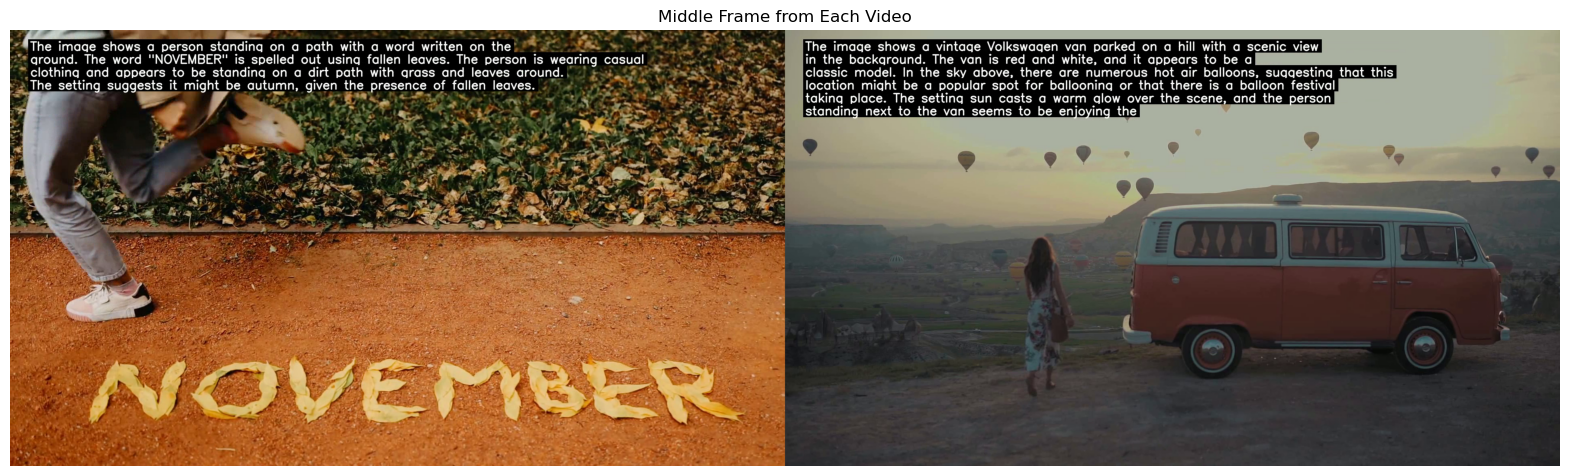

In [24]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# Path to the directory containing the videos
video_directory = 'data/processed_videos/llava-next'

# Get the list of video files in the directory
video_files = [f for f in os.listdir(video_directory) if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]

# List to store middle frames from each video
middle_frames = []

# Extract the middle frame from each video
for video_file in video_files:
    video_path = os.path.join(video_directory, video_file)
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print(f"Error opening video file: {video_file}")
        continue
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    middle_frame_index = total_frames // 2
    
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_index)
    ret, frame = cap.read()
    
    if ret:
        # Convert the frame from BGR (OpenCV) to RGB (Matplotlib)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        middle_frames.append(frame_rgb)
    else:
        print(f"Could not read frame from {video_file}")
    
    cap.release()

# Combine the middle frames horizontally
if middle_frames:
    combined_image = np.hstack(middle_frames)

    # Display the combined image
    plt.figure(figsize=(20, 10))
    plt.imshow(combined_image)
    plt.axis('off')
    plt.title('Middle Frame from Each Video')
    plt.show()
else:
    print("No frames were extracted from the videos.")


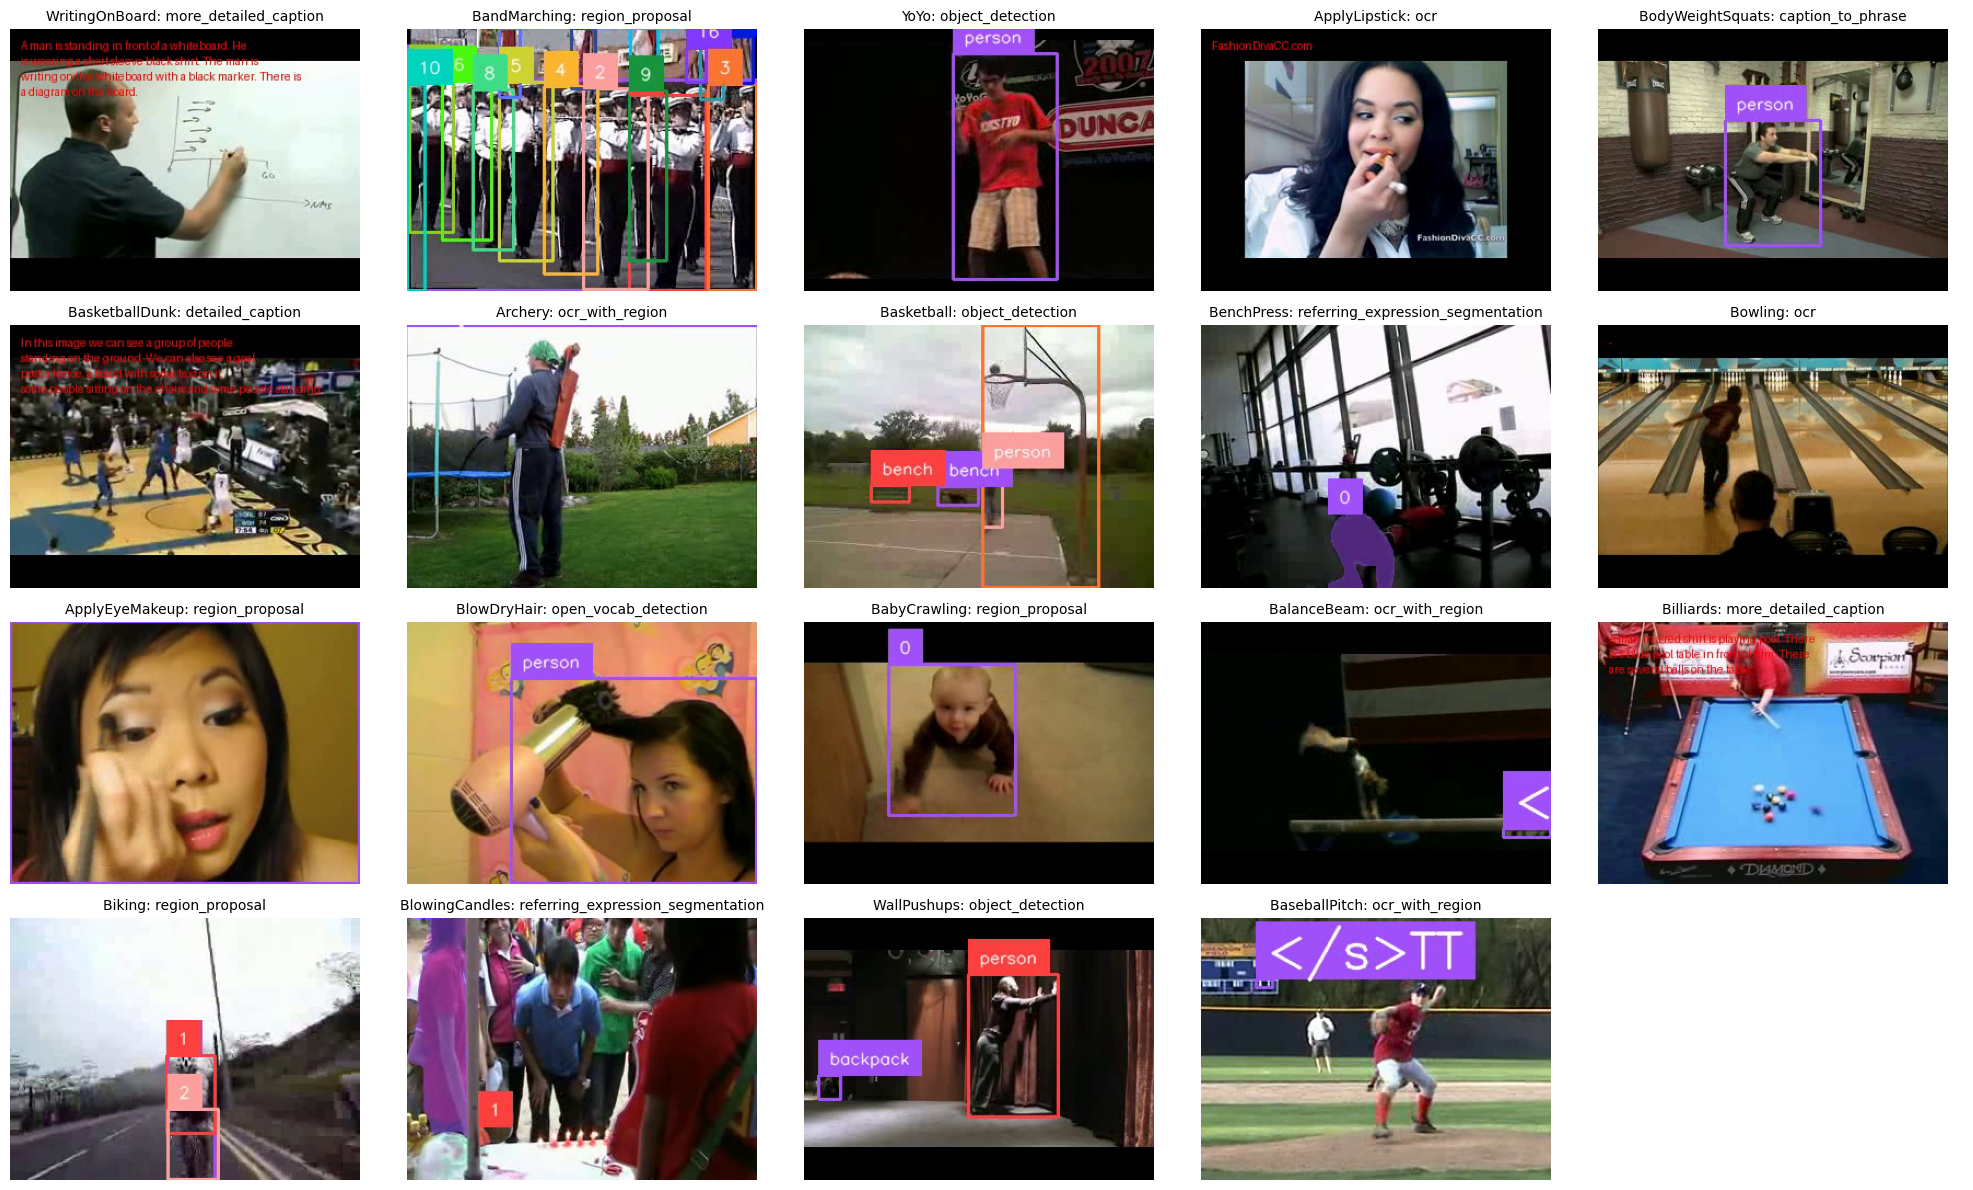

In [21]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import math

# Configuration
BASE_DIR = 'data/processed_videos_ucf101'  # Update this path if different
IMAGE_SIZE = (320, 240)  # Width, Height in pixels

# Function to calculate grid size
def calculate_grid_size(n):
    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)
    return rows, cols

# Function to extract task name from video filename
def extract_task_name(filename):
    name, _ = os.path.splitext(filename)
    parts = name.split('_')
    if len(parts) >= 5:
        return '_'.join(parts[5:])
    else:
        return '_'.join(parts[3:])

# List of task directories
task_dirs = [
    os.path.join(BASE_DIR, d) for d in os.listdir(BASE_DIR)
    if os.path.isdir(os.path.join(BASE_DIR, d))
]

selected_frames = []
task_titles = []

for task_dir in task_dirs:
    # List all .mp4 files in the task directory excluding 'region_to_segmentation'
    video_files = [f for f in os.listdir(task_dir) if f.endswith('.mp4') and 'region_to_segmentation' not in f]
    
    if not video_files:
        continue
    
    # Randomly select one video
    selected_video = random.choice(video_files)
    video_path = os.path.join(task_dir, selected_video)
    
    # Extract task name from filename
    task_name = extract_task_name(selected_video)
    action_name = os.path.basename(task_dir)
    task_titles.append(f"{action_name}: {task_name}")
    
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        continue
    
    # Get total number of frames
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    if frame_count == 0:
        cap.release()
        continue
    
    # Calculate the middle frame index
    middle_frame_idx = frame_count // 2
    
    # Set the video position to the middle frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_idx)
    
    # Read the middle frame
    ret, frame = cap.read()
    cap.release()
    
    if not ret:
        continue
    
    # Convert BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Resize the frame
    frame_resized = cv2.resize(frame_rgb, IMAGE_SIZE)
    
    selected_frames.append(frame_resized)

# Check if any frames were extracted
if selected_frames:
    num_tasks = len(selected_frames)
    GRID_ROWS, GRID_COLS = calculate_grid_size(num_tasks)
    
    fig, axes = plt.subplots(GRID_ROWS, GRID_COLS, figsize=(GRID_COLS * 4, GRID_ROWS * 3))
    axes = axes.flatten()
    
    for idx, ax in enumerate(axes):
        if idx < num_tasks:
            ax.imshow(selected_frames[idx])
            ax.set_title(task_titles[idx], fontsize=10)
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()


Selected Action: BodyWeightSquats
Composite Grid Size: 5 rows x 6 columns


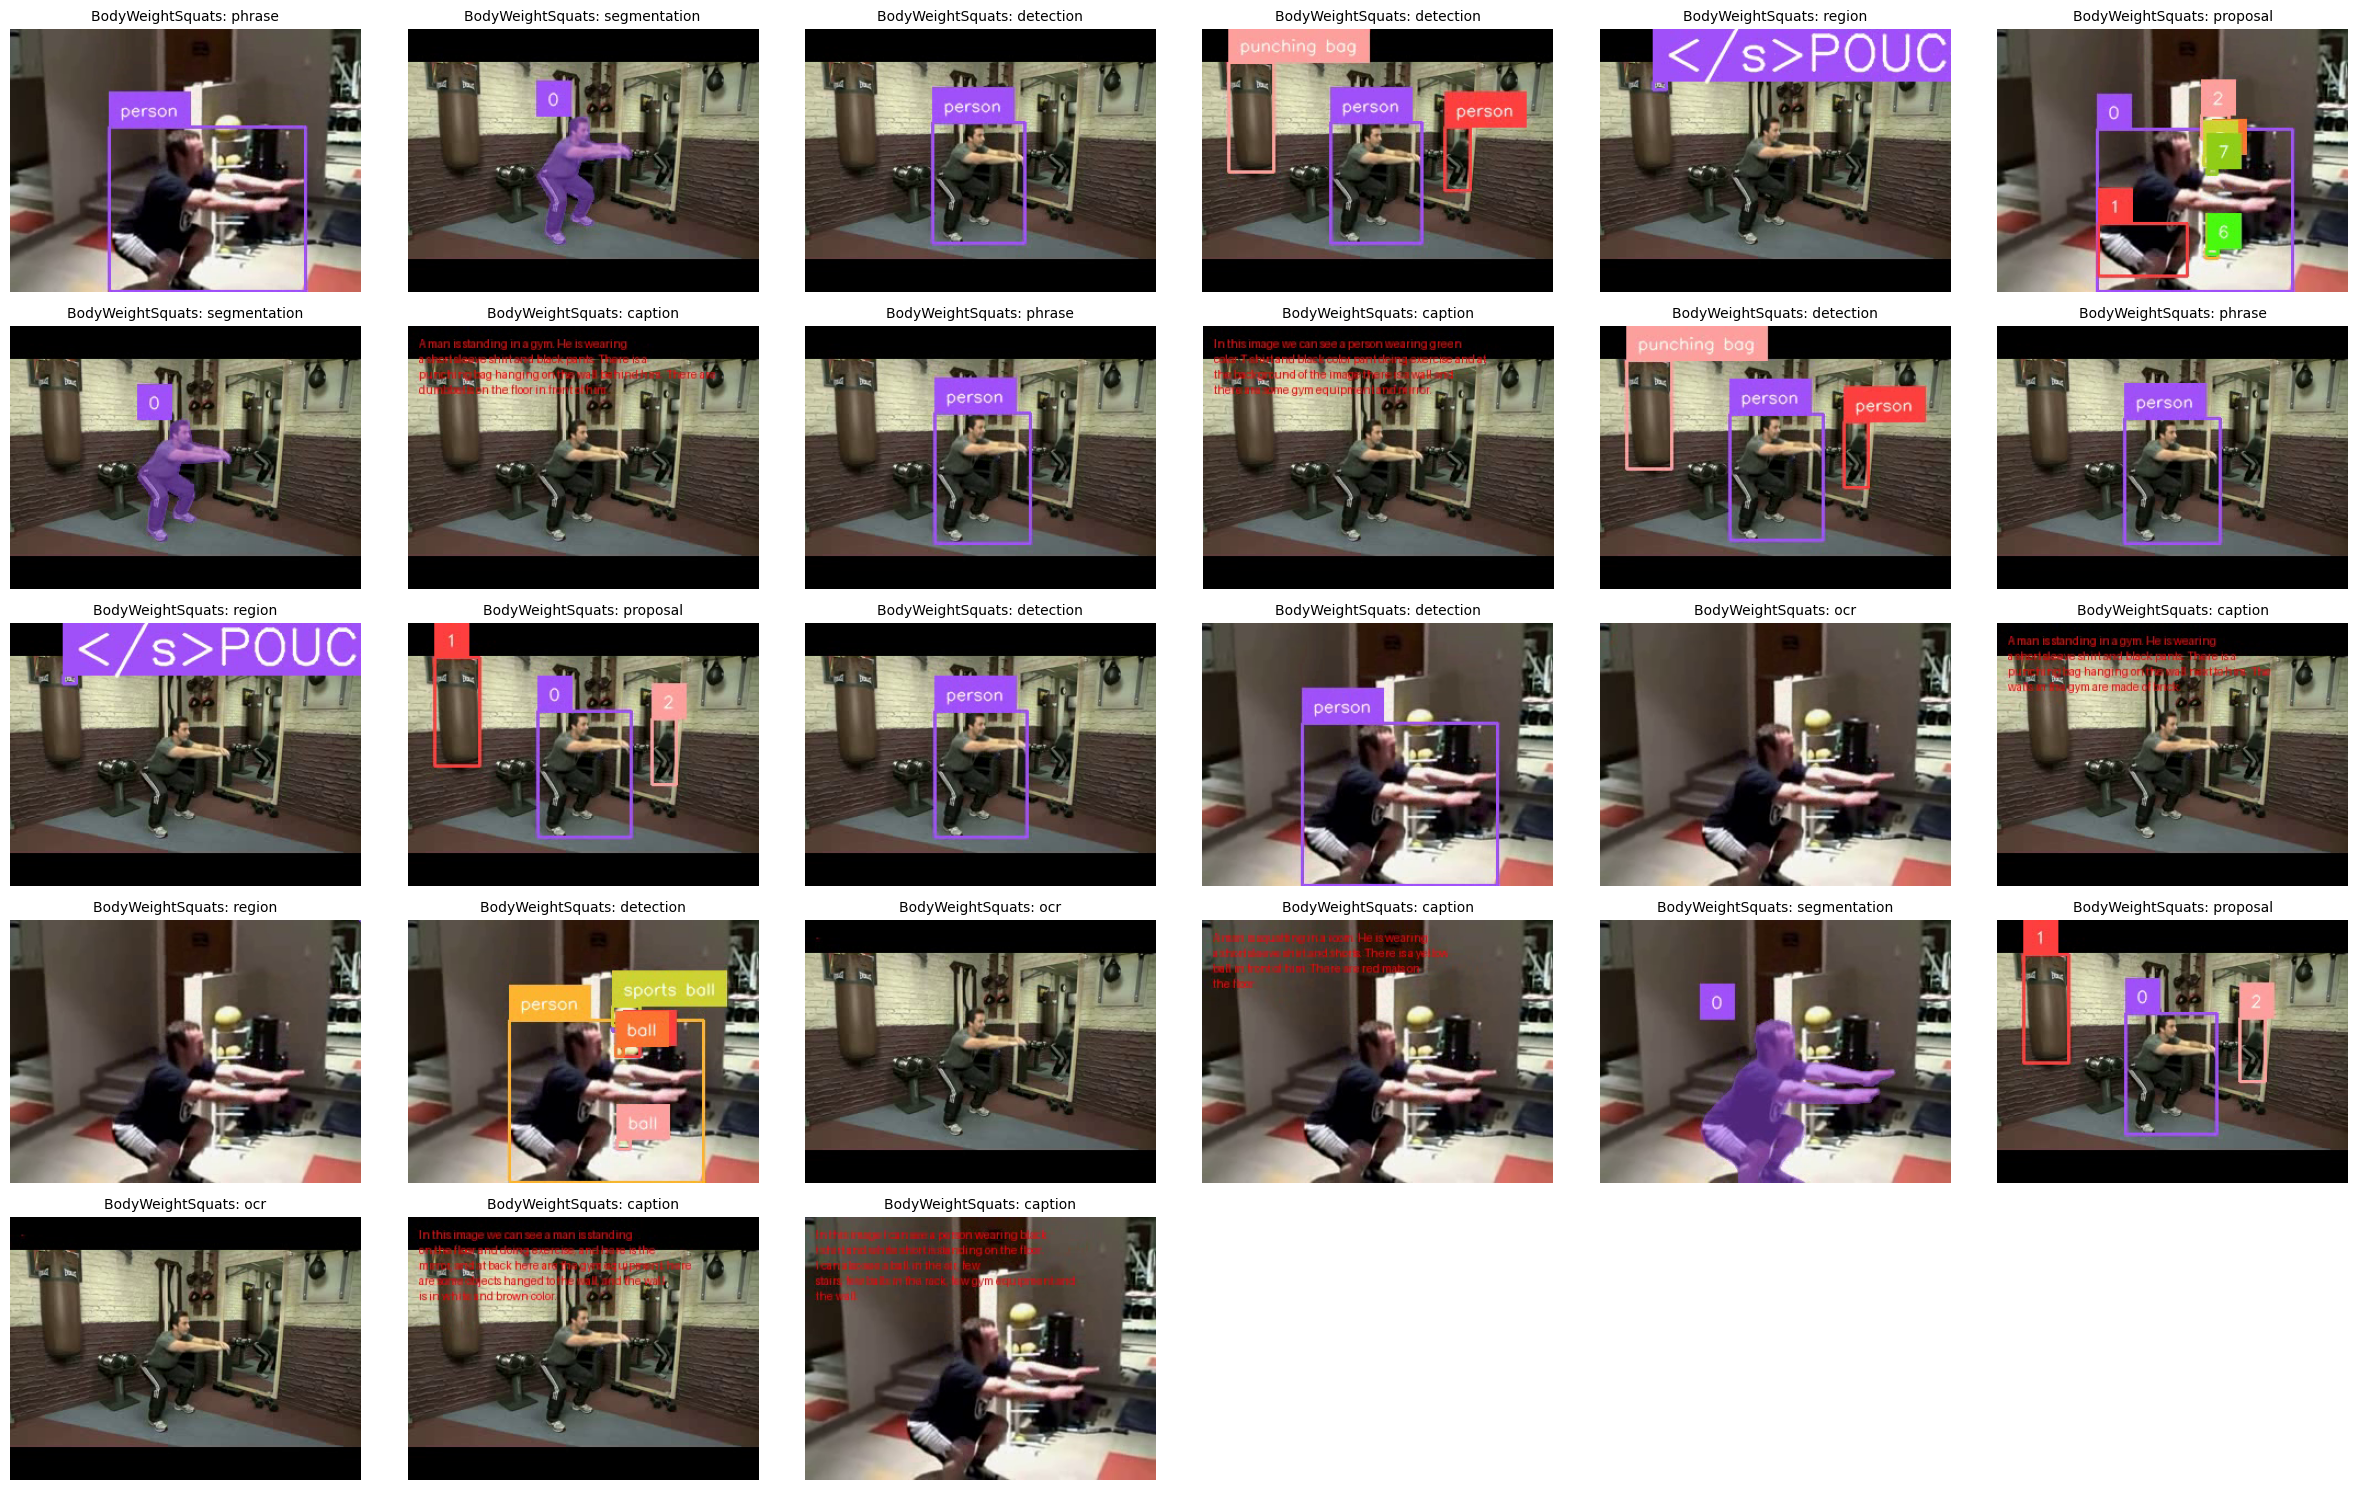

In [22]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import math

# Configuration
BASE_DIR = 'data/processed_videos_ucf101'  # Update this path if different
IMAGE_SIZE = (320, 240)  # Width, Height in pixels

# Function to calculate grid size
def calculate_grid_size(n):
    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)
    return rows, cols

# Function to extract task name from video filename
def extract_task_name(filename):
    name, _ = os.path.splitext(filename)
    parts = name.split('_')
    # Assuming the task is the last part before the numeric suffix
    # Example: v_ApplyEyeMakeup_g03_c04_01_object_detection.mp4
    if len(parts) >= 5:
        return parts[-1]
    else:
        return 'Unknown Task'

# List of action directories
action_dirs = [
    os.path.join(BASE_DIR, d) for d in os.listdir(BASE_DIR)
    if os.path.isdir(os.path.join(BASE_DIR, d))
]

# Select one action directory randomly
selected_action_dir = random.choice(action_dirs)
action_name = os.path.basename(selected_action_dir)
print(f"Selected Action: {action_name}")

# List all .mp4 files in the selected action directory excluding 'region_to_segmentation'
video_files = [
    f for f in os.listdir(selected_action_dir)
    if f.endswith('.mp4') and 'region_to_segmentation' not in f
]

# Check if there are video files after exclusion
if not video_files:
    print(f"No suitable video files found in {selected_action_dir}.")
else:
    selected_frames = []
    task_titles = []
    
    for video_file in video_files:
        video_path = os.path.join(selected_action_dir, video_file)
        
        # Extract task name from filename
        task_name = extract_task_name(video_file)
        task_titles.append(task_name)
        
        # Open the video file
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Failed to open video: {video_path}. Skipping.")
            continue
        
        # Get total number of frames
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        if frame_count == 0:
            print(f"No frames found in video: {video_path}. Skipping.")
            cap.release()
            continue
        
        # Calculate the middle frame index
        middle_frame_idx = frame_count // 2
        
        # Set the video position to the middle frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_idx)
        
        # Read the middle frame
        ret, frame = cap.read()
        cap.release()
        
        if not ret:
            print(f"Failed to read frame {middle_frame_idx} from {video_path}. Skipping.")
            continue
        
        # Convert BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Resize the frame
        frame_resized = cv2.resize(frame_rgb, IMAGE_SIZE)
        
        selected_frames.append(frame_resized)
    
    # Check if any frames were extracted
    if selected_frames:
        num_tasks = len(selected_frames)
        GRID_ROWS, GRID_COLS = calculate_grid_size(num_tasks)
        print(f"Composite Grid Size: {GRID_ROWS} rows x {GRID_COLS} columns")
        
        fig, axes = plt.subplots(GRID_ROWS, GRID_COLS, figsize=(GRID_COLS * 4, GRID_ROWS * 3))
        axes = axes.flatten()
        
        for idx, ax in enumerate(axes):
            if idx < num_tasks:
                ax.imshow(selected_frames[idx])
                ax.set_title(f"{action_name}: {task_titles[idx]}", fontsize=10)
                ax.axis('off')
            else:
                ax.axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No frames were extracted. Please check your video files.")


Composite Grid Size: 2 rows x 3 columns


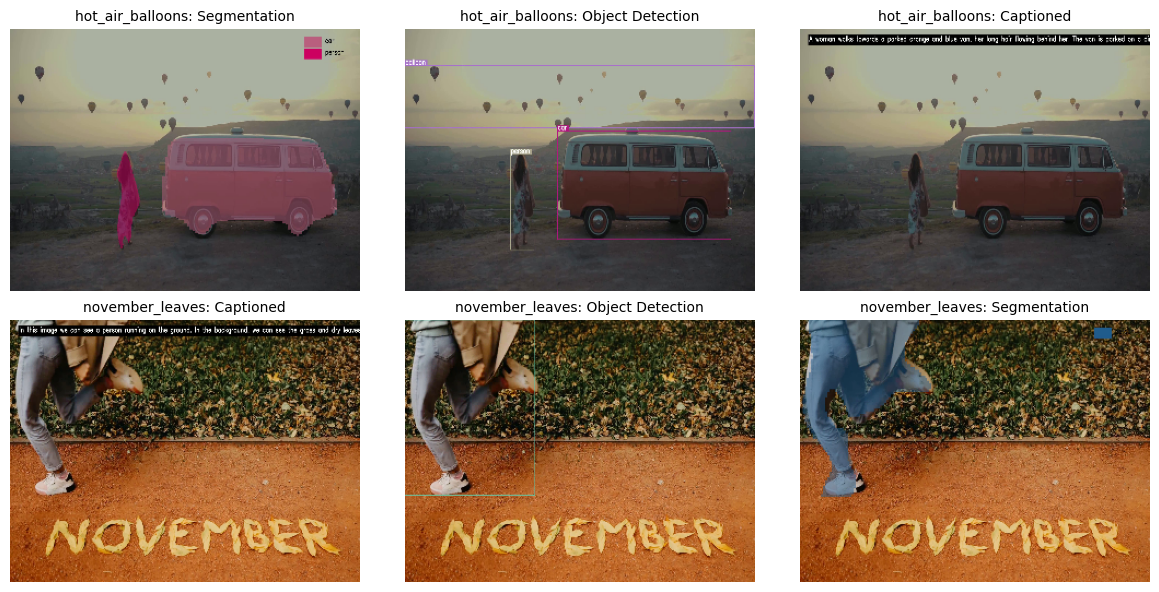

In [25]:
import os
import cv2
import matplotlib.pyplot as plt
import math

# Configuration
IMAGE_SIZE = (320, 240)  # Width, Height in pixels

# Function to calculate grid size
def calculate_grid_size(n):
    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)
    return rows, cols

# Function to map video filename to task name
def map_filename_to_task(filename):
    if 'od_output' in filename:
        return 'Object Detection'
    elif 'captioned' in filename:
        return 'Captioned'
    elif 'segmentation' in filename:
        return 'Segmentation'
    else:
        return 'Unknown Task'

# List of specific action directories
action_dirs = [
    '/home/hamzaz/hamza/apw/Large-Vision-Models/data/processed_videos/peligemma/hot_air_balloons',
    '/home/hamzaz/hamza/apw/Large-Vision-Models/data/processed_videos/peligemma/november_leaves'
]

selected_frames = []
task_titles = []

for action_dir in action_dirs:
    action_name = os.path.basename(action_dir)
    # List all .avi files in the action directory excluding 'region_to_segmentation'
    video_files = [
        f for f in os.listdir(action_dir)
        if f.endswith('.avi') and 'region_to_segmentation' not in f
    ]
    
    if not video_files:
        print(f"No suitable video files found in {action_dir}.")
        continue
    
    for video_file in video_files:
        video_path = os.path.join(action_dir, video_file)
        
        # Map filename to task name
        task_name = map_filename_to_task(video_file)
        task_titles.append(f"{action_name}: {task_name}")
        
        # Open the video file
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Failed to open video: {video_path}. Skipping.")
            continue
        
        # Get total number of frames
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        if frame_count == 0:
            print(f"No frames found in video: {video_path}. Skipping.")
            cap.release()
            continue
        
        # Calculate the middle frame index
        middle_frame_idx = frame_count // 2
        
        # Set the video position to the middle frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_idx)
        
        # Read the middle frame
        ret, frame = cap.read()
        cap.release()
        
        if not ret:
            print(f"Failed to read frame {middle_frame_idx} from {video_path}. Skipping.")
            continue
        
        # Convert BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Resize the frame
        frame_resized = cv2.resize(frame_rgb, IMAGE_SIZE)
        
        selected_frames.append(frame_resized)

# Check if any frames were extracted
if selected_frames:
    num_tasks = len(selected_frames)
    GRID_ROWS, GRID_COLS = calculate_grid_size(num_tasks)
    print(f"Composite Grid Size: {GRID_ROWS} rows x {GRID_COLS} columns")
    
    fig, axes = plt.subplots(GRID_ROWS, GRID_COLS, figsize=(GRID_COLS * 4, GRID_ROWS * 3))
    axes = axes.flatten()
    
    for idx, ax in enumerate(axes):
        if idx < num_tasks:
            ax.imshow(selected_frames[idx])
            ax.set_title(task_titles[idx], fontsize=10)
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No frames were extracted. Please check your video files.")


First 5 rows of the CSV:


Video Name  Frame Count Resolution  \
0  ApplyEyeMakeup/v_ApplyEyeMakeup_g06_c04.avi          100    320x240   
1  ApplyEyeMakeup/v_ApplyEyeMakeup_g06_c04.avi          100    320x240   
2  ApplyEyeMakeup/v_ApplyEyeMakeup_g06_c04.avi          100    320x240   
3  ApplyEyeMakeup/v_ApplyEyeMakeup_g06_c04.avi          100    320x240   
4  ApplyEyeMakeup/v_ApplyEyeMakeup_g06_c04.avi          100    320x240   

   Task Index                      Task Name  Time Taken (minutes)  \
0           1                           <OD>              0.263705   
1           2  <CAPTION_TO_PHRASE_GROUNDING>              0.231556   
2           3              <REGION_PROPOSAL>              0.229971   
3           4    <OPEN_VOCABULARY_DETECTION>              0.210912   
4           5             <DETAILED_CAPTION>              0.325606   

   Total Time (minutes)  
0              3.415521  
1              3.415521  
2              3.415521  
3              3.415521  
4              3.415521


Summary Statistics:


Frame Count  Task Index  Time Taken (minutes)  Total Time (minutes)
count   540.000000  540.000000            540.000000            540.000000
mean    143.907407    5.500000              1.104244             11.042445
std      71.839666    2.874945              2.176036              9.413022
min      30.000000    1.000000              0.059110              2.072169
25%      87.000000    3.000000              0.263691              4.849961
50%     118.000000    5.500000              0.445187              7.920015
75%     188.000000    8.000000              0.835596             13.763102
max     360.000000   10.000000             17.891148             44.489175

/tmp/ipykernel_1116348/4145497651.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_time_per_video.values, y=total_time_per_video.index, palette='viridis')


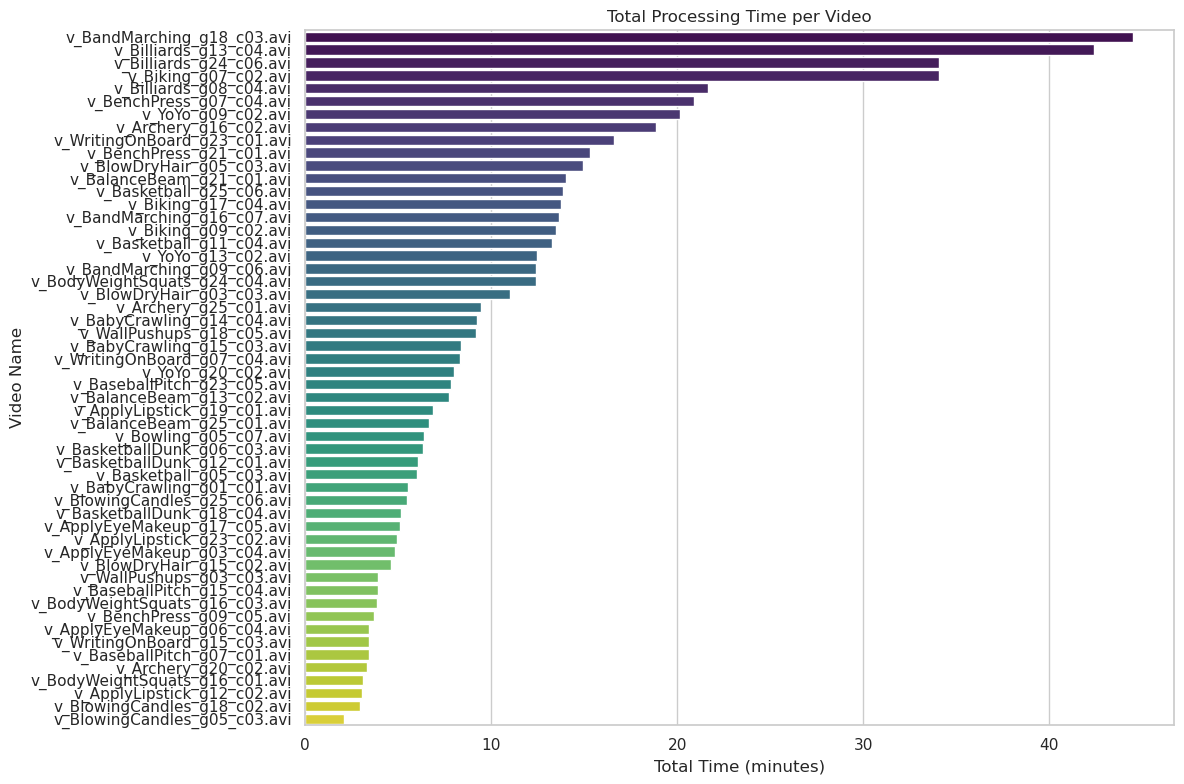

/tmp/ipykernel_1116348/4145497651.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_time_per_task.values, y=total_time_per_task.index, palette='magma')


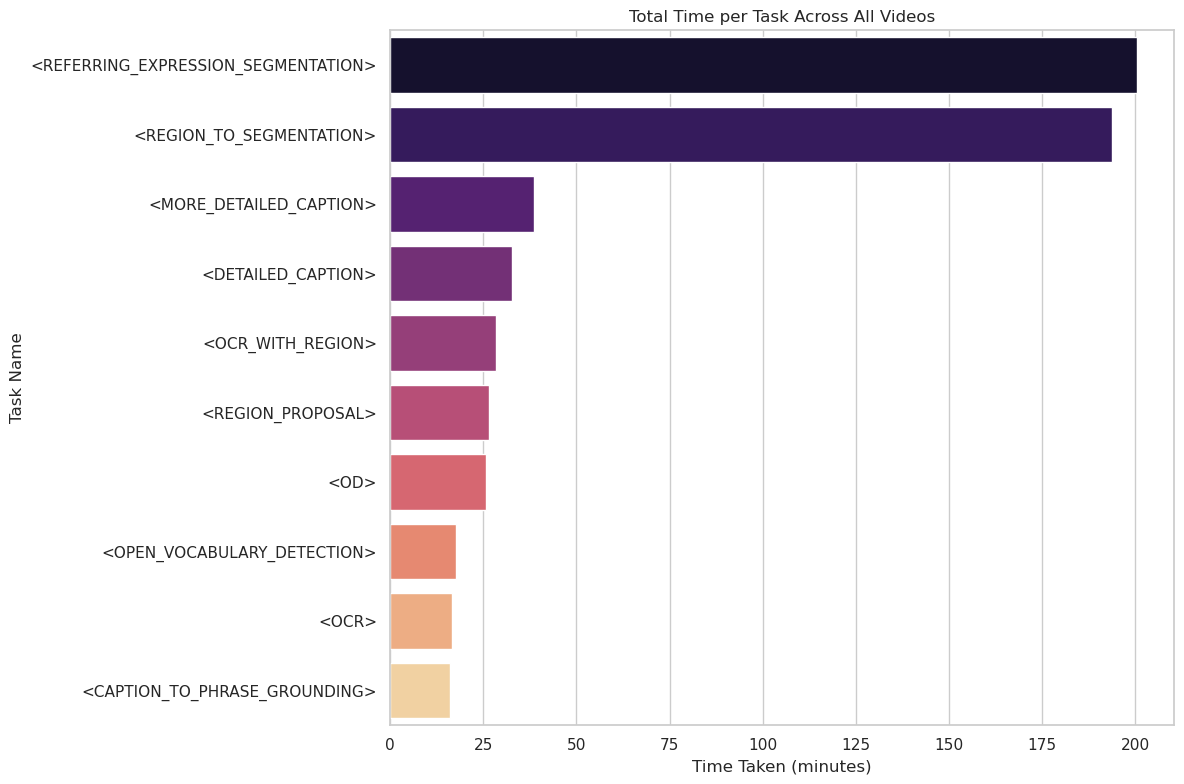

/tmp/ipykernel_1116348/4145497651.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_time_per_task.values, y=average_time_per_task.index, palette='coolwarm')


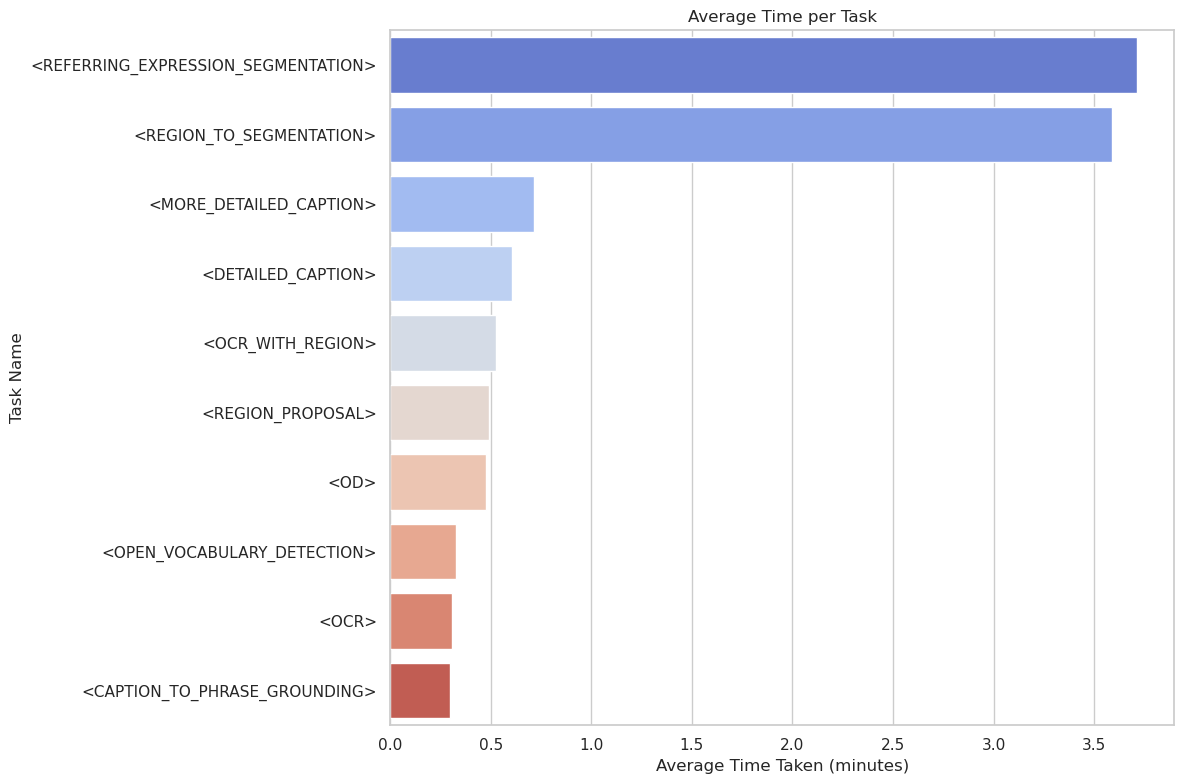

/tmp/ipykernel_1116348/4145497651.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frame_count_per_video.values, y=frame_count_per_video.index, palette='cividis')


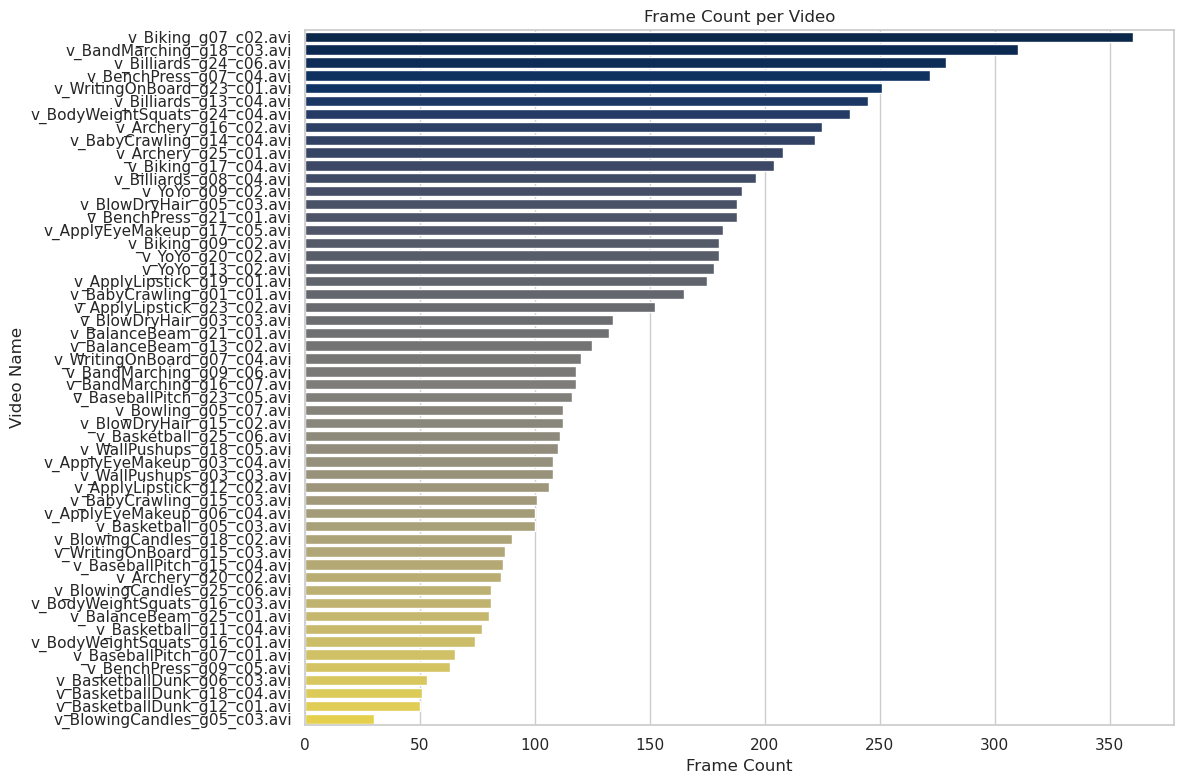

/tmp/ipykernel_1116348/4145497651.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resolution_counts.index, y=resolution_counts.values, palette='Set2')


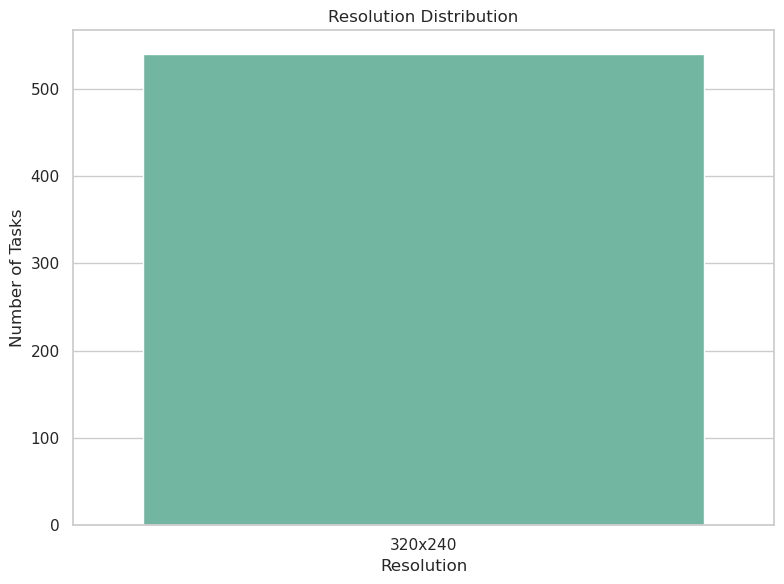


Total Processing Time for the Entire File: 596.29 minutes
Total Number of Videos: 54
Total Number of Unique Tasks: 10


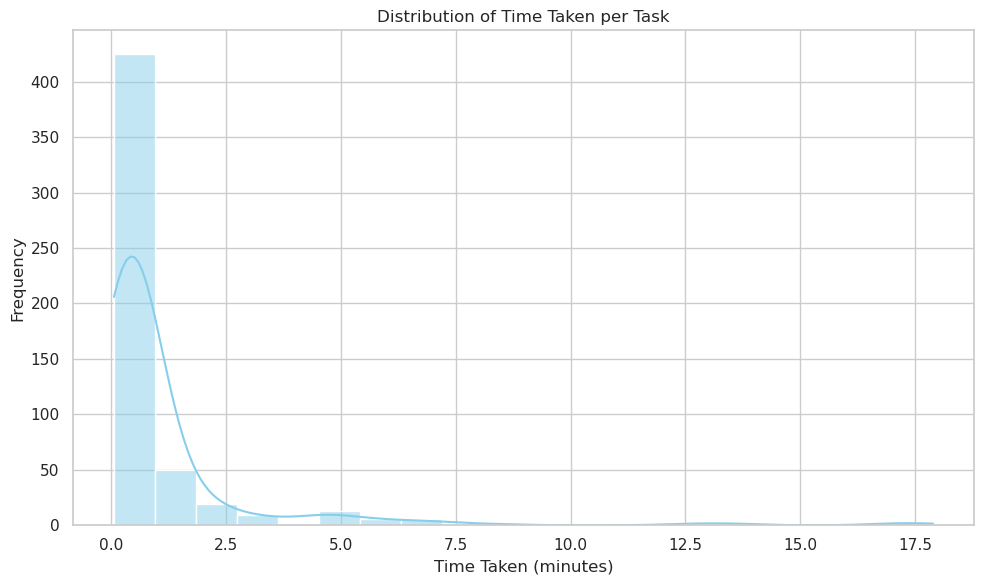

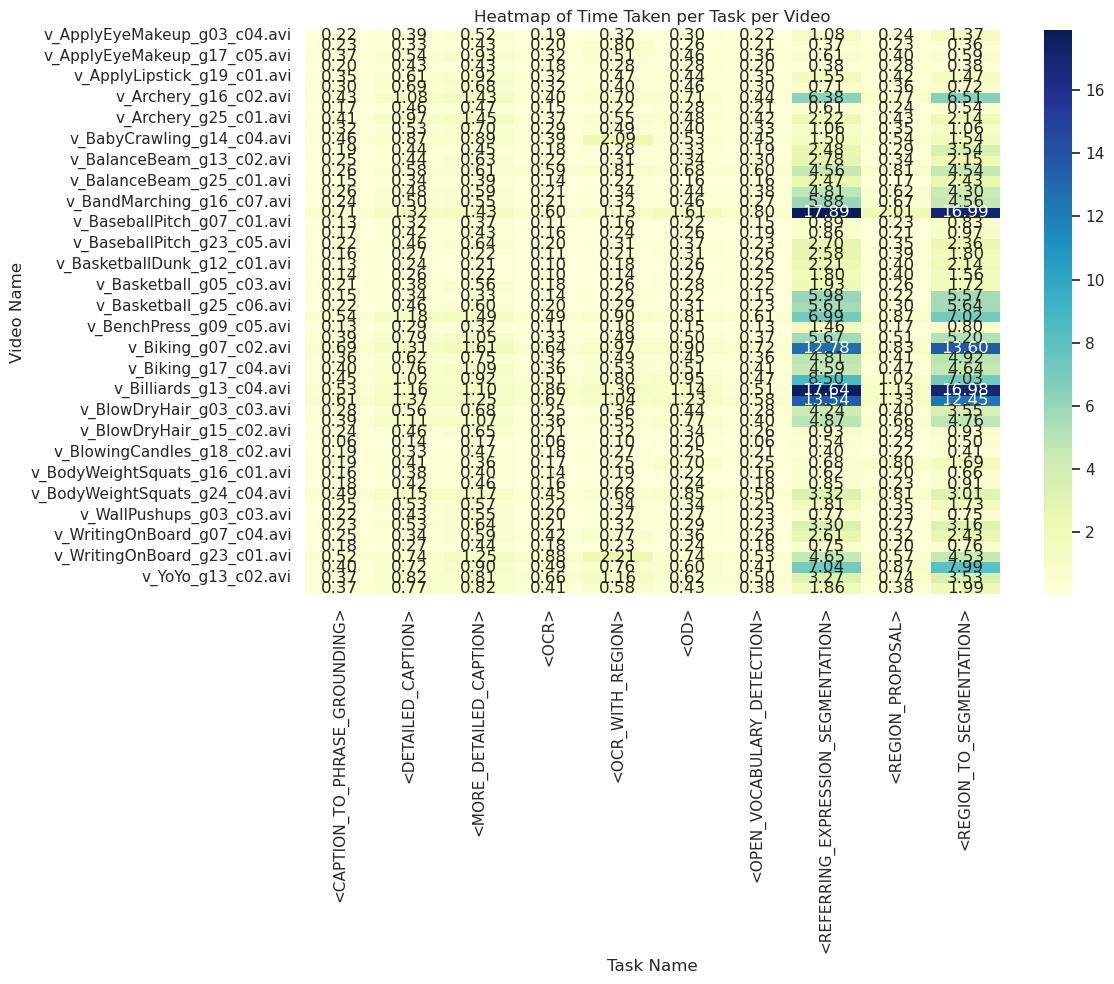

/tmp/ipykernel_1116348/4145497651.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Task Name', y='Time Taken (minutes)', data=df, palette='Set3')


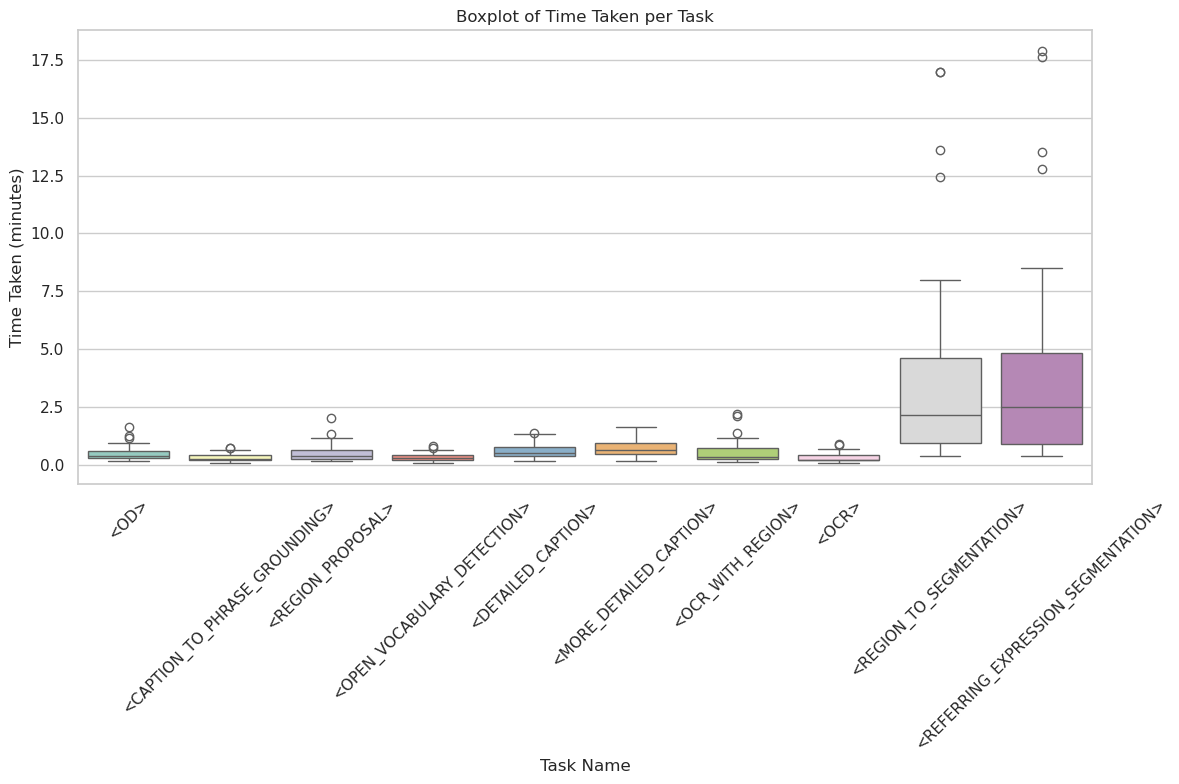

In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configure visualization aesthetics
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# Path to the CSV file
csv_path = '/home/hamzaz/hamza/apw/Large-Vision-Models/video_processing_analytics_ucf.csv'

# Check if the CSV file exists
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"The file {csv_path} does not exist.")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
print("First 5 rows of the CSV:")
display(df.head())

# Convert 'Time Taken (minutes)' and 'Total Time (minutes)' to numeric if not already
df['Time Taken (minutes)'] = pd.to_numeric(df['Time Taken (minutes)'], errors='coerce')
df['Total Time (minutes)'] = pd.to_numeric(df['Total Time (minutes)'], errors='coerce')

# Handle any missing or NaN values
df.dropna(subset=['Time Taken (minutes)', 'Total Time (minutes)'], inplace=True)

# Extract the action name from 'Video Name'
df['Action'] = df['Video Name'].apply(lambda x: x.split('/')[0])

# Extract the base video filename
df['Base Video'] = df['Video Name'].apply(lambda x: os.path.basename(x))

# Summary Statistics
print("\nSummary Statistics:")
display(df.describe())

# -----------------------------
# 1. Total Processing Time per Video
# -----------------------------
total_time_per_video = df.groupby('Base Video')['Total Time (minutes)'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=total_time_per_video.values, y=total_time_per_video.index, palette='viridis')
plt.title('Total Processing Time per Video')
plt.xlabel('Total Time (minutes)')
plt.ylabel('Video Name')
plt.tight_layout()
plt.show()

# -----------------------------
# 2. Total Time per Task Across All Videos
# -----------------------------
total_time_per_task = df.groupby('Task Name')['Time Taken (minutes)'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=total_time_per_task.values, y=total_time_per_task.index, palette='magma')
plt.title('Total Time per Task Across All Videos')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Task Name')
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Average Time per Task
# -----------------------------
average_time_per_task = df.groupby('Task Name')['Time Taken (minutes)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_time_per_task.values, y=average_time_per_task.index, palette='coolwarm')
plt.title('Average Time per Task')
plt.xlabel('Average Time Taken (minutes)')
plt.ylabel('Task Name')
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Frame Count per Video
# -----------------------------
frame_count_per_video = df.groupby('Base Video')['Frame Count'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=frame_count_per_video.values, y=frame_count_per_video.index, palette='cividis')
plt.title('Frame Count per Video')
plt.xlabel('Frame Count')
plt.ylabel('Video Name')
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Resolution Distribution
# -----------------------------
resolution_counts = df['Resolution'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=resolution_counts.index, y=resolution_counts.values, palette='Set2')
plt.title('Resolution Distribution')
plt.xlabel('Resolution')
plt.ylabel('Number of Tasks')
plt.tight_layout()
plt.show()

# -----------------------------
# 6. Total Processing Time for the Entire File
# -----------------------------
total_processing_time = df['Time Taken (minutes)'].sum()
print(f"\nTotal Processing Time for the Entire File: {total_processing_time:.2f} minutes")

# -----------------------------
# 7. Total Number of Videos and Tasks
# -----------------------------
total_videos = df['Base Video'].nunique()
total_tasks = df['Task Name'].nunique()
print(f"Total Number of Videos: {total_videos}")
print(f"Total Number of Unique Tasks: {total_tasks}")

# -----------------------------
# 8. Processing Time Distribution
# -----------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df['Time Taken (minutes)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Time Taken per Task')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# -----------------------------
# 9. Heatmap of Time Taken per Task per Video
# -----------------------------
# Pivot the DataFrame to have videos on one axis and tasks on the other
pivot_table = df.pivot_table(index='Base Video', columns='Task Name', values='Time Taken (minutes)', aggfunc='mean')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Time Taken per Task per Video')
plt.xlabel('Task Name')
plt.ylabel('Video Name')
plt.tight_layout()
plt.show()

# -----------------------------
# 10. Boxplot of Time Taken per Task
# -----------------------------
plt.figure(figsize=(12, 8))
sns.boxplot(x='Task Name', y='Time Taken (minutes)', data=df, palette='Set3')
plt.title('Boxplot of Time Taken per Task')
plt.xlabel('Task Name')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
